In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb
import plotbact as pb

c:\Users\mriza\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Load the data

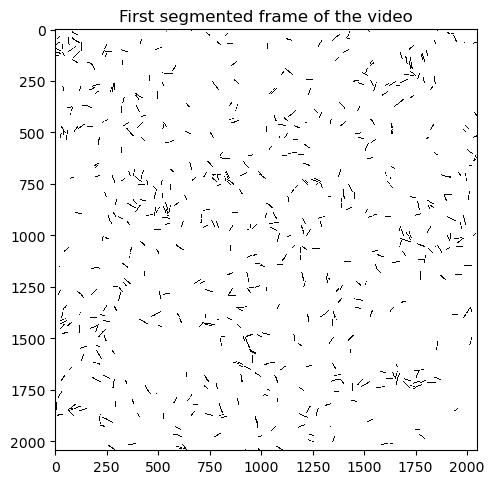

2044 2048


In [2]:
file_name="PilH_dilute_segmented.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|██████████| 241/241 [00:01<00:00, 213.12it/s]


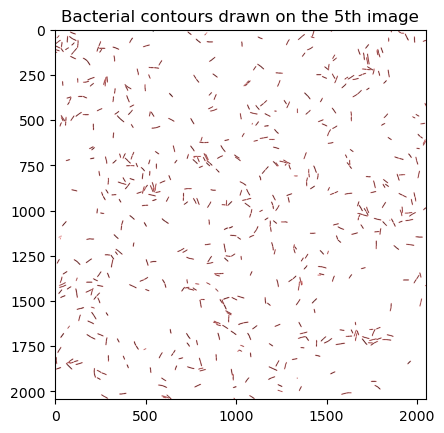

Fitting ellipses to the contours...: 100%|██████████| 241/241 [00:01<00:00, 202.70it/s]


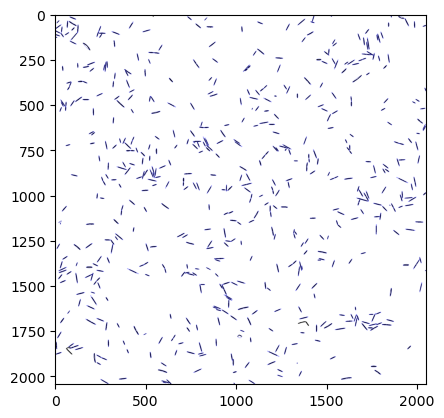

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=5, filter_max=(20,80))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,922.447632,2040.993896,0,6.335873,3.102256,125.772354
1,988.348450,2039.280273,0,15.296427,4.115221,139.704742
2,604.169983,2034.773193,0,20.112776,3.568538,101.115143
3,1088.163940,2033.127686,0,40.736771,4.462940,118.329773
4,608.044861,2030.621338,0,45.339333,4.577644,105.584564
...,...,...,...,...,...,...
141417,621.347900,16.423155,240,62.156528,4.406011,124.804489
141418,118.732414,6.221175,240,21.182425,4.305619,120.974945
141419,1908.673828,5.702821,240,16.720350,3.921356,21.642391
141420,1377.943726,0.198957,240,12.498411,3.770381,85.605019


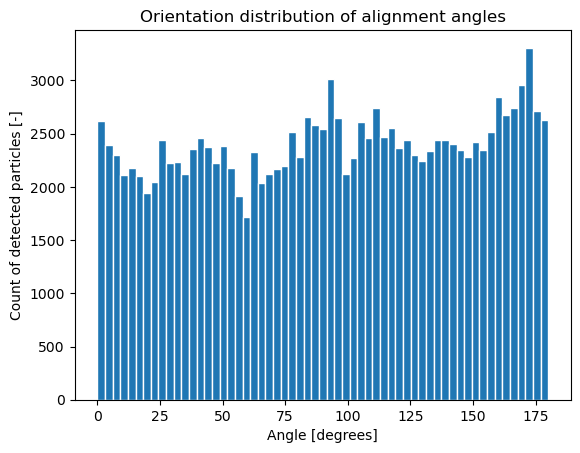

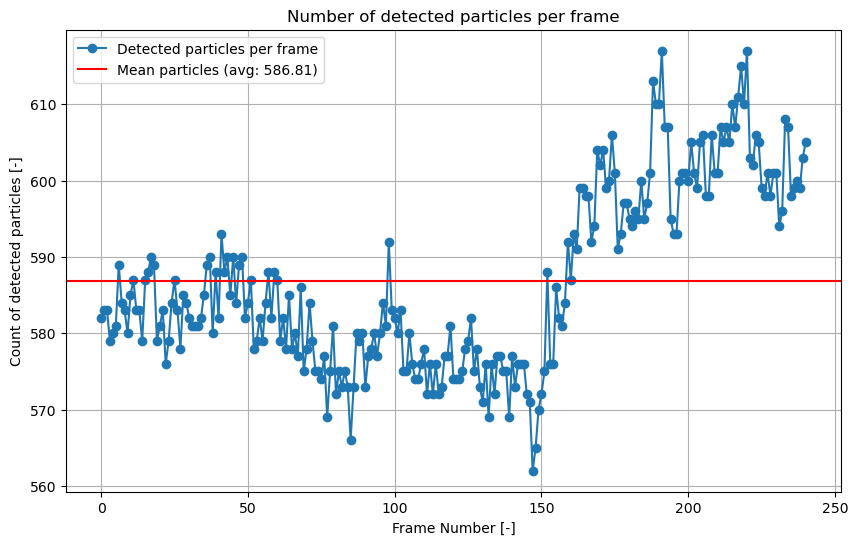

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')
plt.title("Orientation distribution of alignment angles")
plt.xlabel('Angle [degrees]')
plt.ylabel('Count of detected particles [-]')
plt.show()

# Count the number of particles per frame
particles_per_frame = ellipses_df.groupby('frame').size()

# Calculate the mean number of particles across all frames
mean_particles = particles_per_frame.mean()

# Plotting the number of detected particles per frame
plt.figure(figsize=(10,6))
plt.plot(particles_per_frame.index, particles_per_frame.values, marker='o', label='Detected particles per frame')  # Use plt.bar for a bar chart

# Plotting the mean number of particles as a horizontal line
plt.axhline(y=mean_particles, color='r', linestyle='-', label=f'Mean particles (avg: {mean_particles:.2f})')

# Adding titles and labels
plt.title('Number of detected particles per frame')
plt.xlabel('Frame Number [-]')
plt.ylabel('Count of detected particles [-]')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=30)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 240: 605 trajectories present.


,particle,count
0,226,241
1,279,241
2,541,241
3,276,241
4,275,241
...,...,...
852,410,31
853,3143,31
854,502,31
855,4702,31


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,727.921265,706.821777,0,33.724869,4.534549,31.361641,1
1,727.807007,707.196716,1,33.232651,4.428183,30.410664,1
2,729.650513,706.242310,2,32.962780,4.270867,25.709999,1
3,730.794128,704.470337,3,32.283962,4.229006,25.009171,1
4,731.896484,704.648499,4,32.685360,4.206107,18.556778,1
...,...,...,...,...,...,...,...
122107,1173.594727,1239.400391,236,25.572399,4.210090,7.363358,4958
122108,1174.536499,1238.520508,237,24.542925,4.599710,5.137865,4958
122109,1174.529053,1236.947632,238,24.048967,5.008855,3.574347,4958
122110,1175.267944,1236.329468,239,23.725220,5.542592,1.863666,4958


# Load the results of the tracking

In [7]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,727.921265,706.821777,0,33.724869,4.534549,31.361641,1
1,727.807007,707.196716,1,33.232651,4.428183,30.410664,1
2,729.650513,706.242310,2,32.962780,4.270867,25.709999,1
3,730.794128,704.470337,3,32.283962,4.229006,25.009171,1
4,731.896484,704.648499,4,32.685360,4.206107,18.556778,1
...,...,...,...,...,...,...,...
122107,1173.594727,1239.400391,236,25.572399,4.210090,7.363358,4958
122108,1174.536499,1238.520508,237,24.542925,4.599710,5.137865,4958
122109,1174.529053,1236.947632,238,24.048967,5.008855,3.574347,4958
122110,1175.267944,1236.329468,239,23.725220,5.542592,1.863666,4958


# Plot trajectories

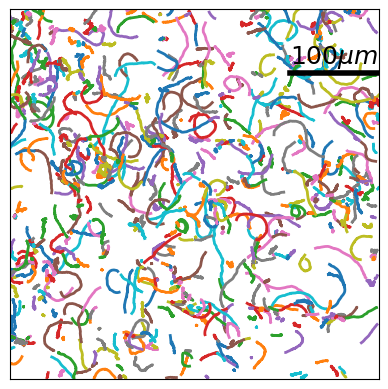

In [8]:
tb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1625)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=3)

display(particle_params)


tb.write_kinematics(particle_params, file_name)

100%|██████████| 857/857 [00:02<00:00, 313.22it/s]


,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,118.287206,114.858539,0,5.480291,0.736864,31.361641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118.268639,114.919466,1,5.400306,0.719580,30.410664,1,-0.006189,0.020309,0.021231,NaN,NaN,NaN,-0.950977,NaN,NaN
2,118.568208,114.764375,2,5.356452,0.694016,25.709999,1,0.099857,-0.051697,0.112445,0.035349,-0.024002,0.042727,-4.700665,-1.249896,NaN
3,118.754046,114.476430,3,5.246144,0.687213,25.009171,1,0.061946,-0.095982,0.114236,-0.012637,-0.014762,0.019432,-0.700829,1.333279,0.861058
4,118.933179,114.505381,4,5.311371,0.683492,18.556778,1,0.059711,0.009650,0.060486,-0.000745,0.035211,0.035219,-6.452393,-1.917188,-1.083489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122107,190.709143,201.402563,236,4.155515,0.684140,7.363358,4958,0.016993,0.002433,0.017167,0.004192,-0.002903,0.005099,-1.210212,-0.373909,-0.116506
122108,190.862181,201.259583,237,3.988225,0.747453,5.137865,4958,0.051013,-0.047660,0.069813,0.011340,-0.016698,0.020184,-2.225493,-0.338427,0.011827
122109,190.860971,201.003990,238,3.907957,0.813939,3.574347,4958,-0.000403,-0.085197,0.085198,-0.017139,-0.012512,0.021220,-1.563517,0.220659,0.186362
122110,190.981041,200.903539,239,3.855348,0.900671,1.863666,4958,0.040023,-0.033484,0.052183,0.013476,0.017238,0.021880,-1.710681,-0.049055,-0.089904


# Data analysis

,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,118.287206,114.858539,0,5.480291,0.736864,31.361641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118.268639,114.919466,1,5.400306,0.719580,30.410664,1,-0.006189,0.020309,0.021231,NaN,NaN,NaN,-0.950977,NaN,NaN
2,118.568208,114.764375,2,5.356452,0.694016,25.709999,1,0.099857,-0.051697,0.112445,0.035349,-0.024002,0.042727,-4.700665,-1.249896,NaN
3,118.754046,114.476430,3,5.246144,0.687213,25.009171,1,0.061946,-0.095982,0.114236,-0.012637,-0.014762,0.019432,-0.700829,1.333279,0.861058
4,118.933179,114.505381,4,5.311371,0.683492,18.556778,1,0.059711,0.009650,0.060486,-0.000745,0.035211,0.035219,-6.452393,-1.917188,-1.083489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122107,190.709143,201.402563,236,4.155515,0.684140,7.363358,4958,0.016993,0.002433,0.017167,0.004192,-0.002903,0.005099,-1.210212,-0.373909,-0.116506
122108,190.862181,201.259583,237,3.988225,0.747453,5.137865,4958,0.051013,-0.047660,0.069813,0.011340,-0.016698,0.020184,-2.225493,-0.338427,0.011827
122109,190.860971,201.003990,238,3.907957,0.813939,3.574347,4958,-0.000403,-0.085197,0.085198,-0.017139,-0.012512,0.021220,-1.563517,0.220659,0.186362
122110,190.981041,200.903539,239,3.855348,0.900671,1.863666,4958,0.040023,-0.033484,0.052183,0.013476,0.017238,0.021880,-1.710681,-0.049055,-0.089904


Indexation of Groups (particles) and their reversals:
       Particle  Reversals
Index                     
0             1         40
1             2         42
2             3         69
3             4         50
4             5         46
...         ...        ...
852        4899          7
853        4941         18
854        4942          9
855        4957         10
856        4958          2

[857 rows x 2 columns]

Total number of unique particles: 857

Average number of reversals: 32.593932322053675
Standard deviation of reversals: 28.576317895220267


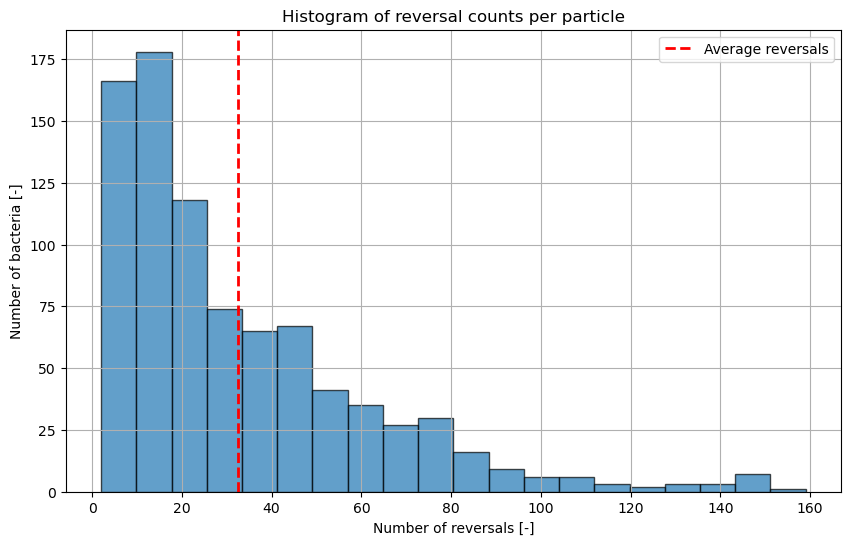

In [10]:
#To quantify reversal
loaded_params=tb.read_kinematics(file_name)
display(loaded_params)
pb.plot_reversals(loaded_params)

Mean velocities for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1          0.013766   0.011628    0.048397
2          0.007271   0.012535    0.035367
3         -0.026852  -0.017206    0.046441
4          0.005622  -0.001901    0.048628
5          0.001400   0.005496    0.038450
...             ...        ...         ...
4899       0.002050   0.038967    0.061028
4941       0.014218  -0.009800    0.053376
4942       0.013639  -0.009413    0.055139
4957      -0.007942   0.004937    0.051944
4958      -0.012657   0.005838    0.055466

[857 rows x 3 columns]
Standard deviations for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1          0.033105   0.044040    0.031773
2          0.019028   0.037622    0.027061
3          0.041531   0.026436    0.035766
4          0.035810   0.044908    0.030819
5          0.022841   0.042960    0.030248
...             ...        ...         .

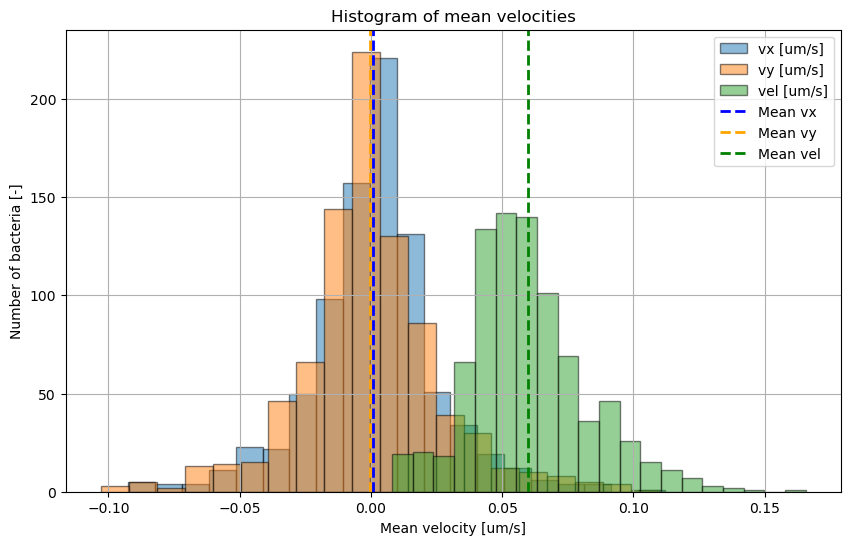

In [11]:
pb.plot_mean_velocities(loaded_params)

Total distance for each particle:
 particle
1       34.845872
2       25.463938
3       33.437547
4       17.360240
5       27.684255
          ...    
4899     6.224851
4941     5.124110
4942     5.293325
4957     4.830807
4958     5.158383
Name: distance, Length: 857, dtype: float64
Mean Trajectory Length: 24.29229810360317
Standard deviation of trajectory length: 15.908385493407785


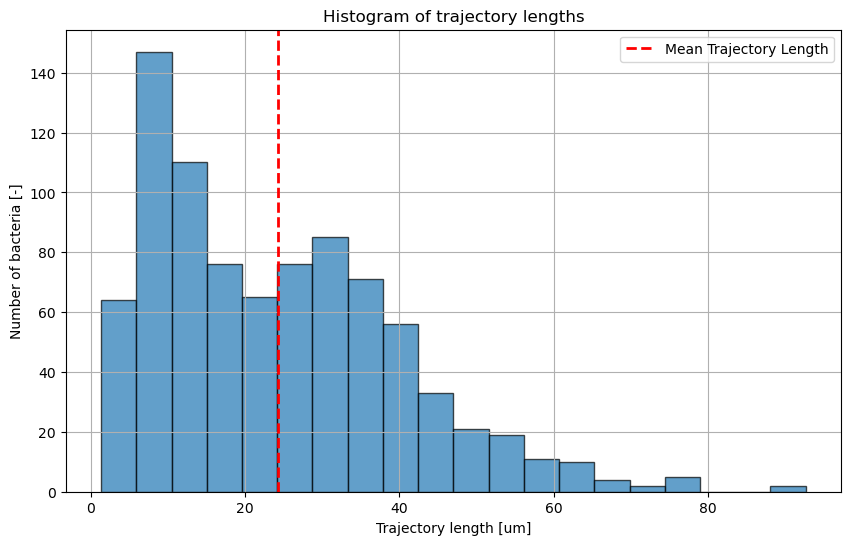

In [12]:
pb.plot_traj_lentgth(loaded_params)